# University Admit Eligibity Predictor

###Import required packages

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# to make plots inline within notebook
%matplotlib inline

###Data Reading and perform data analysis

In [3]:
data = pd.read_csv("Dataset.csv")

In [4]:
data.drop(["Serial No."], axis=1, inplace=True)

In [5]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
data.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

###Visualization

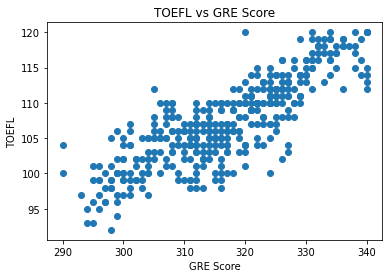

In [9]:
plt.scatter(data['GRE Score'],data['TOEFL Score'])
plt.title('TOEFL vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL')
plt.show()

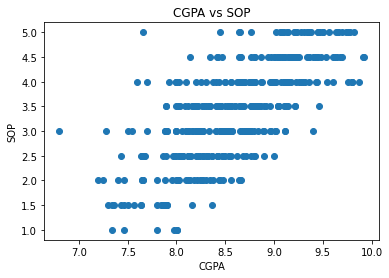

In [ ]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('CGPA vs SOP')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

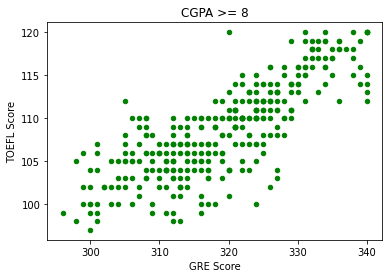

In [10]:
data[data.CGPA >= 8].plot(kind='scatter', x = 'GRE Score', y='TOEFL Score',color="Green")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.title("CGPA >= 8")
plt.show()

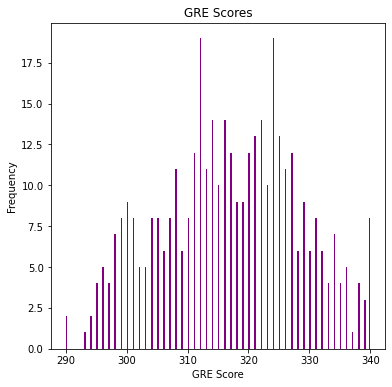

In [ ]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6),color = 'purple')

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

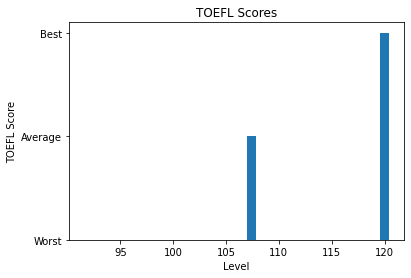

In [11]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

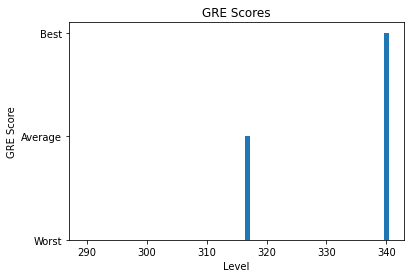

In [12]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

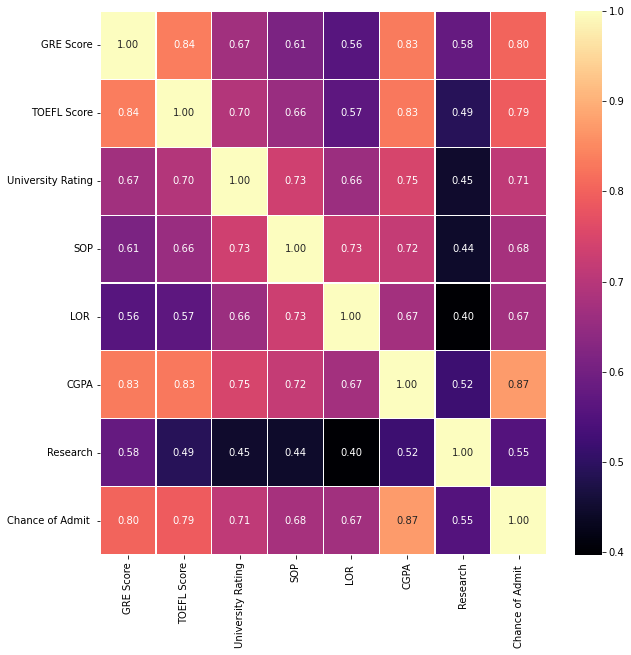

In [13]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

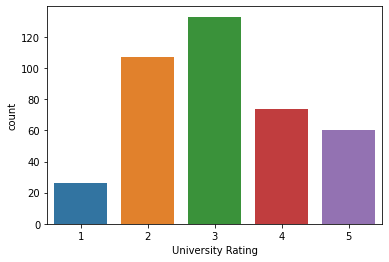

In [14]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

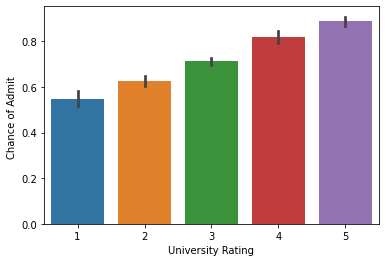

In [15]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

###Train Test Split

In [16]:
X = data.drop(['Chance of Admit '],axis=1) #input data_set
y = data['Chance of Admit '] #output labels

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

###Model Building & Training

In [18]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()
rgr.fit(X_train,y_train)

LinearRegression()

In [19]:
rgr.score(X_test,y_test)

0.8212082591486993

In [20]:
y_predict=rgr.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.047956733620911976
Mean Squared Error: 0.004617003377285005
Root Mean Squared Error: 0.06794853476922813


###Saving the models

In [24]:
pickle.dump(rgr, open("regressor.pkl", "wb"))

###Hosting the model

In [25]:
reg = pickle.load(open("regressor.pkl", "rb"))

In [26]:
def makeprediction(gre,toefl,ur,lor,sop,cgpa,research):
  tup = [[gre,toefl,ur,lor,sop,cgpa,research]]
  model = pickle.load(open('regressor.pkl','rb'))
  ans = model.predict(tup)
  return ans[0]

In [27]:
makeprediction(340,120,5,5,5,10,1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


1.013055381752395